## <h1>Markov Chain Monte Carlo</h1>

# 0. Rejection Sampling

# 1. Importance Sampling

# 2. Metropolis-Hastings Algorithm

## 2.0 Detailed Balance

For state $x$ and $x'$, the detailed balance is satisfied when, 

> $p(x)T(x'|x) = p(x')T(x|x')$

Such that $p(x)$ is in the equilibrium position.

In [19]:
# detailed balance

import numpy as np 

T = np.array([[0, 1, 0], [0, 0.1, 0.9], [0.6, 0.4, 0]])

# initialize state
u = np.array([0.5, 0.3, 0.2])

for _ in range(30):
    u = np.dot(u, T)
    print(u)

[0.12 0.61 0.27]
[0.162 0.289 0.549]
[0.3294 0.4105 0.2601]
[0.15606 0.47449 0.36945]
[0.22167  0.351289 0.427041]
[0.2562246 0.4276153 0.3161601]
[0.18969606 0.42545017 0.38485377]
[0.23091226 0.38618259 0.38290515]
[0.22974309 0.42269258 0.34756433]
[0.2085386  0.41103808 0.38042332]
[0.22825399 0.40181173 0.36993427]
[0.22196056 0.41640888 0.36163056]
[0.21697834 0.40825368 0.37476799]
[0.22486079 0.4077109  0.36742831]
[0.22045698 0.41260321 0.36693981]
[0.22016389 0.40849323 0.37134289]
[0.22280573 0.40955036 0.36764391]
[0.22058634 0.41081833 0.36859533]
[0.2211572  0.40910631 0.3697365 ]
[0.2218419  0.40996243 0.36819568]
[0.22091741 0.41011641 0.36896618]
[0.22137971 0.40951552 0.36910477]
[0.22146286 0.40997317 0.36856397]
[0.22113838 0.40988577 0.36897585]
[0.22138551 0.4097173  0.36889719]
[0.22133831 0.40991612 0.36874557]
[0.22124734 0.40982815 0.36892451]
[0.2213547  0.40979996 0.36884534]
[0.2213072  0.40987283 0.36881996]
[0.22129198 0.40982247 0.36888555]


## 2.1 Metropolis-Hastings Algorithm
+ Initialize $x^{(0)}$

+ For $i=0$ to $N-1$

> Sample $u \sim U(0, 1)$

> Sample $x^{*} \sim q(x^* | x^{(i)})$

> If $u < A(x^{(i)}, x^*) = \min(1, \frac{p(x^*) q(x^{(i)}|x^*))}
{p(x^{(i)})q(x^*|x^{(i)})})$

>> $x^{(i+1)} = x^*$

> else

>> $x^{(i+1)} = x^{(i)}$

## 2.2 Acceptance probability

> $A(x, x') = \min(1, \frac{p(x') q(x|x')}{p(x)q(x'|x)})$

Let $T(x'|x) = q(x'|x)A(x, x')$

> $p(x)T(x'|x) = p(x)q(x'|x)A(x, x')$

> $= p(x)q(x'|x) \min(1, \frac{p(x') q(x|x')}{p(x)q(x'|x)})$

> $= \min (p(x)q(x'|x), p(x') q(x|x'))$

> $= p(x')q(x|x') \min (\frac{p(x)q(x'|x)}{p(x') q(x|x')}, 1)$

> $= p(x')q(x|x') A(x', x)$

> $= p(x')T(x|x')$

$\Rightarrow$

> $p(x)T(x'|x) = p(x')T(x|x')$

The detailed balance condition is satisfied.

In [15]:
# MCMC
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

np.random.seed(20170430)

"""
# target distribution
p(x) = 0.3 exp (-0.2 x**2) + 0.7 exp (-0.2(x-10)**2)

# proposal distribution, gaussian
q(x'|x) = norm(x, 100)
"""

x = np.arange(-10, 20, 0.01)

def p(x):
    return 0.3 * np.exp(-0.2 * x ** 2) + 0.7 * np.exp (-0.2 * (x-10)**2 )

def q(x, loc, scale=100):
    # return q(x|loc), which is norm(x|loc, scale)
    return norm.pdf(x, loc=loc, scale=scale)

def sample(n_iter):
    # initialize 
    x0 = np.random.random()
    
    x = []
    
    for i in range(n_iter):
        x.append(x0)
        
        # sample u
        u = np.random.random()
        
        # sample x1
        x1 = np.random.normal(x0, 100)
        
        p_x0 = p(x0)
        p_x1 = p(x1)
        
        # transition probability, which is pdf here
        q_x0 = q(x0, x1, 100)
        q_x1 = q(x1, x0, 100)
        
        A = min(1, (p_x1 * q_x0) / (p_x0 * q_x1) )
        # A = min(1, (p_x0 * q_x1) / (p_x1 * q_x0) )

        if u < A:
        #if (p_x0 * q_x1) / (p_x1 * q_x0) > 1.0:
            x0 = x1
            # x.append(x0)
        else:
            x0 = x0

            
    return x


samples = sample(10000)

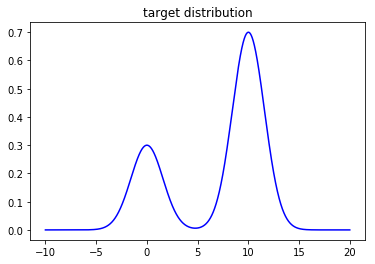

In [7]:
y = p(x)
plt.plot(x, y, 'b-', label='target')
plt.title('target distribution')
plt.show()

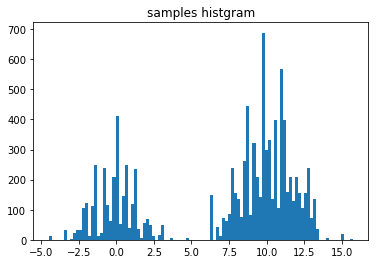

In [16]:
plt.hist(samples, bins=100)
plt.title('samples histgram')
plt.show()

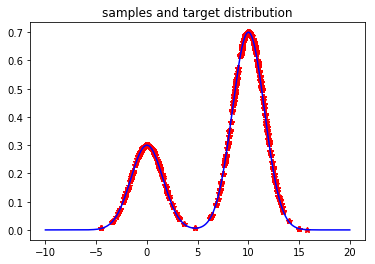

In [12]:
a = np.array(sorted(samples))
b = p(a)

plt.plot(a, b, 'r*')
plt.plot(x, y, 'b-')
plt.title('samples and target distribution')
plt.show()

# 3. Gibbs sampling

To sample from $d-$demensional distribution, let the proposal distribution be, 

> $q(x'|x) = p(x'_j | x_{-j})$, if $x_{-j} = x'_{-j}$, otherwise 0.

where, 

> $p(x_j | x_{-j}) = p(x_j|x_1, x_2, ..., x_{j-1}, x_{j+1}, ..., x_{d-1}, x_d)$

## Acceptance Probability

> $A(x, x') = \min \left\{1, \frac{p(x')q(x|x')}{p(x)q(x'|x)} \right\}$

> $= \min\left\{1, \frac{p(x')p(x_j|x'_{-j})}{p(x)p(x'_j|x_{-j})}\right\}$

> $= \min\left\{1, \frac{p(x_{-j})}{p(x'_{-j})}\right\}$

> $= 1$

The proposal move is always accepted.

## Detailed Balance Condition

> $p(x)T(x'|x) = p(x)q(x'|x)A(x, x')$

> $= p(x)p(x'_j|x_{-j})$

> $= \frac{p(x)p(x')}{p(x_{-j})}$

> $= \frac{p(x)p(x')}{p(x'_{-j})}$

> $= p(x')p(x_j|x'_{-j})$

> $= p(x')T(x|x')$